## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup

# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Define input file paths
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [4]:
# Read the mouse data from first input file
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
# Read the study results from second input file 
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the mouse data and the trial results into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='inner')
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check for errors and misisng data in the merged file 
clean_merged_df = merged_df.dropna(how='any')
print(clean_merged_df.head())

# There are no Null data as number of rows in clean_merged_df is same as those in merged_df

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [8]:
# Number of mice
mouse_count = merged_df["Mouse ID"].nunique()
mouse_count

249

In [9]:
# Find the number of unique mice in each drug regimen - total mice = 249
mouse_per_drug_regimen = merged_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_per_drug_regimen # Note that Stelasyn used only 24 mice  

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [10]:
# Check how many timepoints each mouse has  
treatment_per_mouse = merged_df["Mouse ID"].value_counts().sort_values(ascending=False)
treatment_per_mouse.head()
# Each mouse has 10 datapoints- except g989

g989    13
i635    10
k382    10
t198    10
j755    10
Name: Mouse ID, dtype: int64

In [11]:
# Mouse ID g989 is showing 13 entries - so we may need to "clean" that data by deleting that mouse
# Find the datapoints for mouse g989
check_df = merged_df.set_index("Mouse ID") # Set Mouse ID as index
check_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [12]:
 # Find mouse g989
mouse_g989 = check_df.loc["g989", :]
mouse_g989 
# Mouse g989 has inaccurate / multiple values for various timepoints -total of 13 entries
# We will have to delete this mouse from the study.

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [13]:
# Delete the mouse g989 from the original merged dataframe
cleaned_df = check_df.drop(index = 'g989')
cleaned_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Reset index of cleaned dataframe
cleaned_df = cleaned_df.reset_index()

# 248 mice with 10 datapoints each shoule be 2480 - right? How come there are 1880 rows?
# cleaned_df = cleaned_df.drop(columns="index", "level_0") # used this to delete columns added during index reset
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Number of datapoints per treatment are the timepoints for all mice in the treatment
timepoints_per_drug = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()

# Calculate Mean of Tumor Volume by Regimen
mean_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate Median of Tumor Volume by Regimen
median_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of Tumor Volume by Regimen
var_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of Tumor Volume by Regimen
std_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of Tumor Volume by Regimen
sem_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Create the summary statistics DataFrame of Tumor Volume by Regimen
tumor_vol_sum_stats_df = pd.DataFrame({"Trial Count": timepoints_per_drug,
                                       "Mean": mean_tumor_vol_by_drug,
                                      "Median": median_tumor_vol_by_drug,
                                      "Variance": var_tumor_vol_by_drug,
                                      "Standard deviation": std_tumor_vol_by_drug,
                                      "SEM": sem_tumor_vol_by_drug
                                      })

# Display the summary statistics for Tumor Volume by Regimen
tumor_vol_sum_stats_df


,Trial Count,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Trial Count, dtype: int64


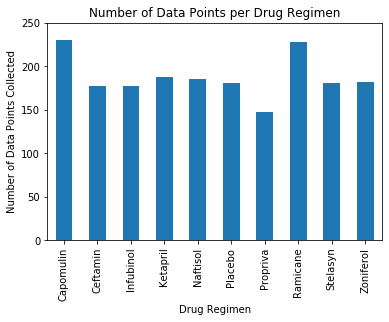

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints = tumor_vol_sum_stats_df["Trial Count"]
print(datapoints)

# Define dataframe variables to be plotted
datapoints.plot(kind='bar')

# Define plot options
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points Collected")
plt.ylim(0,250)

# Save bar plot 
plt.savefig("Images/PandasBar.png") 

# Display plot
plt.show()
plt.tight_layout()


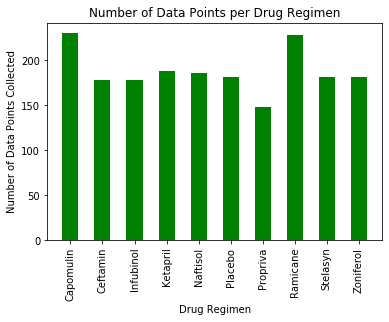

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Define variables to be plotted
xaxis = np.arange(len(datapoints))
tick_locations = xaxis.copy()

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Define plot options
plt.xticks(tick_locations)
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points Collected")
plt.xlabel("Drug Regimen")

# Generate bar plot
plt.bar(xaxis, datapoints, color='green', align='center', width = .5)

# Save bar plot 
plt.savefig("Images/PyplotBar.png")

# Show bar plot 
plt.show()

## Pie plots

In [19]:
# Identify the number of female and male mice in the study 
# Group the mice by "Sex" and count the unique mice by "Mouse ID"
mouse_count_by_sex = cleaned_df.groupby("Sex")["Mouse ID"].nunique()
mouse_count_by_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

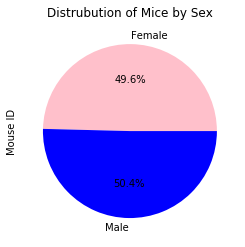

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Define plot options
colors = ("Pink", "Blue")
plt.title("Distrubution of Mice by Sex")
plt.ylabel("")

# Generate Pandas Pie plot
mouse_count_by_sex.plot.pie(autopct='%1.1f%%', colors=colors, subplots=True, figsize=(5, 5), y="") # y=" "

# Save Pandas Pie plot
plt.savefig("Images/PandasPie.png")

# Display Pandas Pie plot
plt.show()

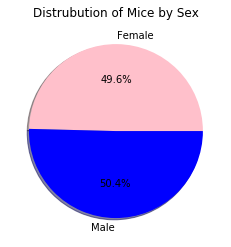

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define plot options
labels=("Female", "Male")
colors = ("Pink", "Blue")
plt.title("Distrubution of Mice by Sex")

# Generate Pyplot Pie plot
plt.pie(mouse_count_by_sex, colors=colors, labels=labels,autopct="%1.1f%%", shadow=True)

# Save Pyplot Pie plot
plt.savefig("Images/PyplotPie.png")

# Display Pyplot Pie plot
plt.show()

## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Capomulin, Ramicane, Infubinol, Ceftamin

# Create a dataframe for the Capomulin regimen
capomulin_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Ramicane"), :]
#print(capomulin_df.head())
# 228r x 8c

# Select only rows where Timepoint = 45 to get the final tumor volume for each mouse 
capomulin_final_df = capomulin_df.loc[capomulin_df["Timepoint"] == 45]
capomulin_final_timepoints = capomulin_final_df["Mouse ID"].count()

print("\n********************* CAPOMULIN ********************\n")
print(capomulin_final_df)

# Calculate Q1, Q3, IQR and quantitatively determine if there are any potential outliers  
capomulin_quartiles = capomulin_final_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
capomulin_lowerq = round(capomulin_quartiles[0.25], 2)
capomulin_upperq = round(capomulin_quartiles[0.75], 2)
capomulin_iqr = round(capomulin_upperq - capomulin_lowerq, 2)

print(f"\nNumber of data points: {capomulin_final_timepoints}")
print(f"\nLower Quartile: {capomulin_lowerq}")
print(f"\nUpper Quartile: {capomulin_upperq}")
print(f"\nInter Quartile Range: {capomulin_iqr}")

# Calculate lower bound and upper bound to find the Outliers
capomulin_lower_bound = round(capomulin_lowerq - (1.5*capomulin_iqr), 2)
capomulin_upper_bound = round(capomulin_upperq + (1.5*capomulin_iqr), 2)
print(f"\nPotential outliers: Below {capomulin_lower_bound} (mm3) and above {capomulin_upper_bound} (mm3)")

# Find the outliers
capomulin_outliers_df = capomulin_final_df.loc[(capomulin_final_df['Tumor Volume (mm3)'] > capomulin_upper_bound) | 
                                        (capomulin_final_df['Tumor Volume (mm3)'] < capomulin_lower_bound), :]
print("\nOutliers if any are given in the table below: \n")
print(capomulin_outliers_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])


********************* CAPOMULIN ********************

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9       k403     Ramicane    Male          21          16         45   
49      g791     Ramicane    Male          11          16         45   
59      s508     Ramicane    Male           1          17         45   
74      m546     Ramicane    Male          18          16         45   
84      z578     Ramicane    Male          11          16         45   
94      j913     Ramicane  Female           4          17         45   
114     n364     Ramicane    Male           4          17         45   
154     c758     Ramicane    Male           9          17         45   
174     a644     Ramicane  Female           7          17         45   
184     i177     Ramicane    Male          10          18         45   
194     j989     Ramicane    Male           8          19         45   
214     a520     Ramicane    Male          13          21         45   
234     r

In [70]:
# Create a dataframe for the Ramicane regimen
ramicane_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Ramicane"), :]
# print(ramicane_df.head())
# 228r x 8c

# Select only rows where Timepoint = 45 to get the final tumor volume for each mouse
ramicane_final_df = ramicane_df.loc[ramicane_df["Timepoint"] == 45]
ramicane_final_timepoints = ramicane_final_df["Mouse ID"].count()

print("\n********************* RAMICANE ********************\n")
print(ramicane_final_df)

# Calculate Q1, Q3, IQR and quantitatively determine if there are any potential outliers 
ramicane_quartiles = ramicane_final_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
ramicane_lowerq = round(ramicane_quartiles[0.25], 2)
ramicane_upperq = round(ramicane_quartiles[0.75], 2)
ramicane_iqr = round(ramicane_upperq - ramicane_lowerq, 2)

print(f"\nNumber of data points: {ramicane_final_timepoints}")
print(f"\nLower Quartile: {ramicane_lowerq}")
print(f"\nUpper Quartile: {ramicane_upperq}")
print(f"\nInter Quartile Range: {ramicane_iqr}")

# Calculate lower bound and upper bound to find the Outliers
ramicane_lower_bound = round(ramicane_lowerq - (1.5*ramicane_iqr), 2)
ramicane_upper_bound = round(ramicane_upperq + (1.5*ramicane_iqr), 2)
print(f"\nPotential outliers: Below {ramicane_lower_bound} (mm3) and above {ramicane_upper_bound} (mm3)")


# Find the outliers
ramicane_outliers_df = ramicane_final_df.loc[(ramicane_final_df['Tumor Volume (mm3)'] > ramicane_upper_bound) | 
                                        (ramicane_final_df['Tumor Volume (mm3)'] < ramicane_lower_bound), :]
print("\nOutliers if any are given in the table below: \n")
print(ramicane_outliers_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])


********************* RAMICANE ********************

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9       k403     Ramicane    Male          21          16         45   
49      g791     Ramicane    Male          11          16         45   
59      s508     Ramicane    Male           1          17         45   
74      m546     Ramicane    Male          18          16         45   
84      z578     Ramicane    Male          11          16         45   
94      j913     Ramicane  Female           4          17         45   
114     n364     Ramicane    Male           4          17         45   
154     c758     Ramicane    Male           9          17         45   
174     a644     Ramicane  Female           7          17         45   
184     i177     Ramicane    Male          10          18         45   
194     j989     Ramicane    Male           8          19         45   
214     a520     Ramicane    Male          13          21         45   
234     r8

In [71]:
# Create a dataframe for the Infubinol regimen
infubinol_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Infubinol"), :]
# print(infubinol_df)

# Select only rows where Timepoint = 45 to get the final tumor volume for each mouse
infubinol_final_df = infubinol_df.loc[infubinol_df["Timepoint"] == 45]
infubinol_final_timepoints = infubinol_final_df["Mouse ID"].count()

print("\n********************* INFUBINOL ********************\n")
print(infubinol_final_df)

# Calculate Q1, Q3, IQR and quantitatively determine if there are any potential outliers 
infubinol_quartiles = infubinol_final_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
infubinol_lowerq = round(infubinol_quartiles[0.25], 2)
infubinol_upperq = round(infubinol_quartiles[0.75], 2)
infubinol_iqr = round(infubinol_upperq - infubinol_lowerq, 2)

print(f"\nNumber of data points: {infubinol_final_timepoints}")
print(f"\nLower Quartile: {infubinol_lowerq}")
print(f"\nUpper Quartile: {infubinol_upperq}")
print(f"\nInter Quartile Range: {infubinol_iqr}")

# Calculate lower bound and upper bound to find the Outliers
infubinol_lower_bound = round(infubinol_lowerq - (1.5*infubinol_iqr), 2)
infubinol_upper_bound = round(infubinol_upperq + (1.5*infubinol_iqr), 2)
print(f"\nPotential outliers: Below {infubinol_lower_bound} (mm3) and above {infubinol_upper_bound} (mm3)")

# Find the outliers
infubinol_outliers_df = infubinol_final_df.loc[(infubinol_final_df['Tumor Volume (mm3)'] > infubinol_upper_bound) | 
                                        (infubinol_final_df['Tumor Volume (mm3)'] < infubinol_lower_bound), :]
print("\nOutliers if any are given in the table below: \n")
print(infubinol_outliers_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])


********************* INFUBINOL ********************

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
463      a203    Infubinol  Female          20          23         45   
473      a251    Infubinol  Female          21          25         45   
540      a685    Infubinol    Male           8          30         45   
637      c139    Infubinol    Male          11          28         45   
800      e476    Infubinol    Male          23          26         45   
834      f345    Infubinol    Male          23          26         45   
1040     k483    Infubinol  Female          20          30         45   
1800     y163    Infubinol  Female          17          27         45   
1859     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
463            67.973419                 2  
473            65.525743                 1  
540            66.083066                 3  
637            72.226731          

In [73]:
# Create a dataframe for the Ceftamin regimen
ceftamin_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Ceftamin"), :]
# print(ceftamin_df)

# Select only rows where Timepoint = 45 to get the final tumor volume for each mouse
ceftamin_final_df = ceftamin_df.loc[ceftamin_df["Timepoint"] == 45]
ceftamin_final_timepoints = ceftamin_final_df["Mouse ID"].count()

print("\n********************* CEFTAMIN ********************\n")
print(ceftamin_final_df)

# Calculate Q1, Q3, IQR and quantitatively determine if there are any potential outliers
ceftamin_quartiles = ceftamin_final_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
ceftamin_lowerq = round(ceftamin_quartiles[0.25], 2)
ceftamin_upperq = round(ceftamin_quartiles[0.75], 2)
ceftamin_iqr = round(ceftamin_upperq - ceftamin_lowerq, 2)

print(f"\nNumber of data points: {ceftamin_final_timepoints}")
print(f"\nLower Quartile: {ceftamin_lowerq}")
print(f"\nUpper Quartile: {ceftamin_upperq}")
print(f"\nInter Quartile Range: {ceftamin_iqr}")

# Calculate lower bound and upper bound to find the Outliers
ceftamin_lower_bound = round(ceftamin_lowerq - (1.5*ceftamin_iqr), 2)
ceftamin_upper_bound = round(ceftamin_upperq + (1.5*ceftamin_iqr), 2)
print(f"\nPotential outliers: Below {ceftamin_lower_bound} (mm3) and above {ceftamin_upper_bound} (mm3)")

# Find the outliers
ceftamin_outliers_df = ceftamin_final_df.loc[(ceftamin_final_df['Tumor Volume (mm3)'] > ceftamin_upper_bound) | 
                                        (ceftamin_final_df['Tumor Volume (mm3)'] < ceftamin_lower_bound), :]
print("\nOutliers if any are given in the table below: \n")
print(ceftamin_outliers_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])


********************* CEFTAMIN ********************

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
493      a275     Ceftamin  Female          20          28         45   
980      j296     Ceftamin  Female          24          30         45   
1020     k210     Ceftamin    Male          15          28         45   
1099     l471     Ceftamin  Female           7          28         45   
1119     l661     Ceftamin    Male          18          26         45   
1149     l733     Ceftamin  Female           4          30         45   
1247     o287     Ceftamin    Male           2          28         45   
1366     p438     Ceftamin  Female          11          26         45   
1657     w151     Ceftamin    Male          24          25         45   
1760     x581     Ceftamin  Female          19          28         45   
1784     x822     Ceftamin    Male           3          29         45   
1832     y769     Ceftamin  Female           6          27         45 

In [74]:
# Based on calculations performed above, no outliers for final tumor volume exist in either of the 4 drug treatments.

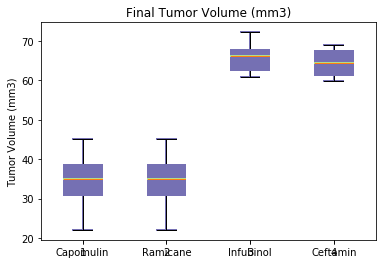

In [86]:
# Define data to plot 
capomulin_plot = capomulin_final_df["Tumor Volume (mm3)"]
ramicane_plot = ramicane_final_df["Tumor Volume (mm3)"]
infubinol_plot = infubinol_final_df["Tumor Volume (mm3)"]
ceftamin_plot = ceftamin_final_df["Tumor Volume (mm3)"]

data_to_plot = [capomulin_plot, ramicane_plot, infubinol_plot,ceftamin_plot]

# Define plot options
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume (mm3)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax1.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    #box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
# Generate Box plot
ax1.boxplot(data_to_plot)

# Save Box plot
plt.savefig("Images/Box.png", bbox_inches='tight')

# Display Box Plot
plt.show() 

## Line and scatter plots

In [99]:
# Generate a line plot of timepoint versus tumor volume for a mouse treated with Capomulin (select one s185, i557, r157)

#Take use input for which mouse to select (giving 3 options)
mouse_id = input("Select a Capomulin treated mouse(s185 or i557 or r157):  ")

# Filter original data for just that mouse ID
capomulin_mouse_df = cleaned_df.loc[(cleaned_df["Mouse ID"] == mouse_id),:]
capomulin_mouse_df

Select a Capomulin treated mouse(s185 or i557 or r157):  s185


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


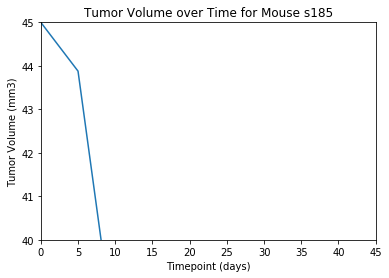

In [103]:
# Generate a line plot of timepoint versus tumor volume for the selected mouse treated with Capomulin
# Set variables to hold relevant data
timepoint = capomulin_mouse_df["Timepoint"]
tumor_volume = capomulin_mouse_df["Tumor Volume (mm3)"]

# Define plot options
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume over Time for Mouse {mouse_id}")
plt.xlim(0, timepoint.max())
plt.ylim(40, capomulin_mouse_df["Tumor Volume (mm3)"].max())

# Generate the line plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Save the line plot
plt.savefig(f"Images/Line plot for Mouse {mouse_id}.png")

# Display the line chart
plt.show()

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1439     r157    Capomulin    Male          22          25          0   
1440     r157    Capomulin    Male          22          25          5   
1441     r157    Capomulin    Male          22          25         10   
1442     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

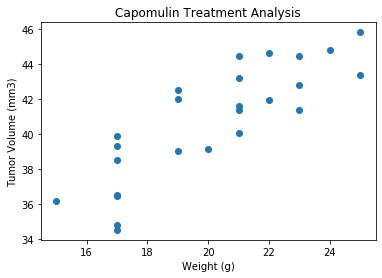

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter original data for just that mouse ID
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
print(capomulin_df)

# Define x and y values
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Define plot options
plt.title("Capomulin Treatment Analysis")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Generate the scatter plot 
plt.scatter(mouse_weight,avg_tumor_volume)

# Save the scatter plot
plt.savefig("Images/Scatter.png")

# Display the scatter plot
plt.show()

Slope of the line = 0.95
Equation of the line: y = 0.95x + 21.55

y = 0.95x + 21.55


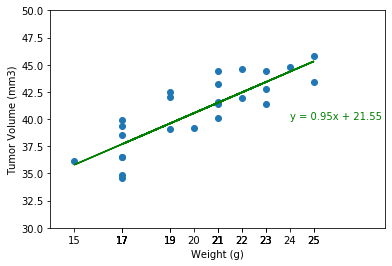

The correlation between average weight and average tumor volume is 0.84


In [122]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen

# Identify x and y values - Mean weight vs. Mean Tumor Volume for the Capomulin regimen
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression mouse weight and avg tumor volume
slope, intercept, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
slope = round(slope,2)
intercept = round(intercept, 2)
r = round(r, 2)
p = round(p, 2)

# Create equation of line to calculate predicted avg tumor volume
yvalue = slope * mouse_weight + intercept

# Print the equation
print(f"Slope of the line = {slope}")
print(f"Equation of the line: y = {slope}x + {intercept}\n") 
line_equation = "y = " + str(slope) + "x + "+ str(intercept)
print(line_equation)

# Define plot options
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(14,28)
plt.ylim(30,50)
plt.xticks(mouse_weight)

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)

# Generate the line plot
plt.plot(mouse_weight,yvalue,"-", color='g')
plt.annotate(line_equation, (24, 40), fontsize=10, color='g')

# Save the scatter plot
plt.savefig("Images/LinearRegression.png")

# Display the plot
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between average weight and average tumor volume is {corr}')